In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [135]:
df = pd.read_csv('/workspaces/ml_CIN0144/datasets/housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [136]:
df_encoded = pd.get_dummies(df, columns=["Neighborhood"], dtype=int)
df_encoded.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0


In [137]:
df_encoded[df_encoded["Price"] < 0]

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
1266,1024,2,2,2006,-24715.242482,0,0,1
2310,1036,4,1,1983,-7550.504574,0,1,0
3630,1235,3,2,2012,-19871.251146,1,0,0
4162,1352,5,2,1977,-10608.359522,0,1,0
5118,1140,4,1,2020,-23911.003119,0,0,1
5951,1097,4,3,1981,-4537.418615,1,0,0
6355,1016,5,2,1997,-13803.684059,1,0,0
8720,1235,3,1,1952,-24183.000515,0,0,1
9611,1131,3,3,1959,-13692.026068,0,0,1
10597,1177,2,3,2010,-434.097124,0,0,1


In [138]:
df_encoded = df_encoded[df_encoded["Price"] > 0]

In [139]:
df_encoded.shape

(49978, 8)

In [140]:
binary_cols = ["Neighborhood_Rural", "Neighborhood_Suburb", "Neighborhood_Urban"]

for col in binary_cols:
    counts = df_encoded[col].value_counts().reindex([0,1], fill_value=0)
    print(counts)

Neighborhood_Rural
0    33310
1    16668
Name: count, dtype: int64
Neighborhood_Suburb
0    33262
1    16716
Name: count, dtype: int64
Neighborhood_Urban
0    33384
1    16594
Name: count, dtype: int64


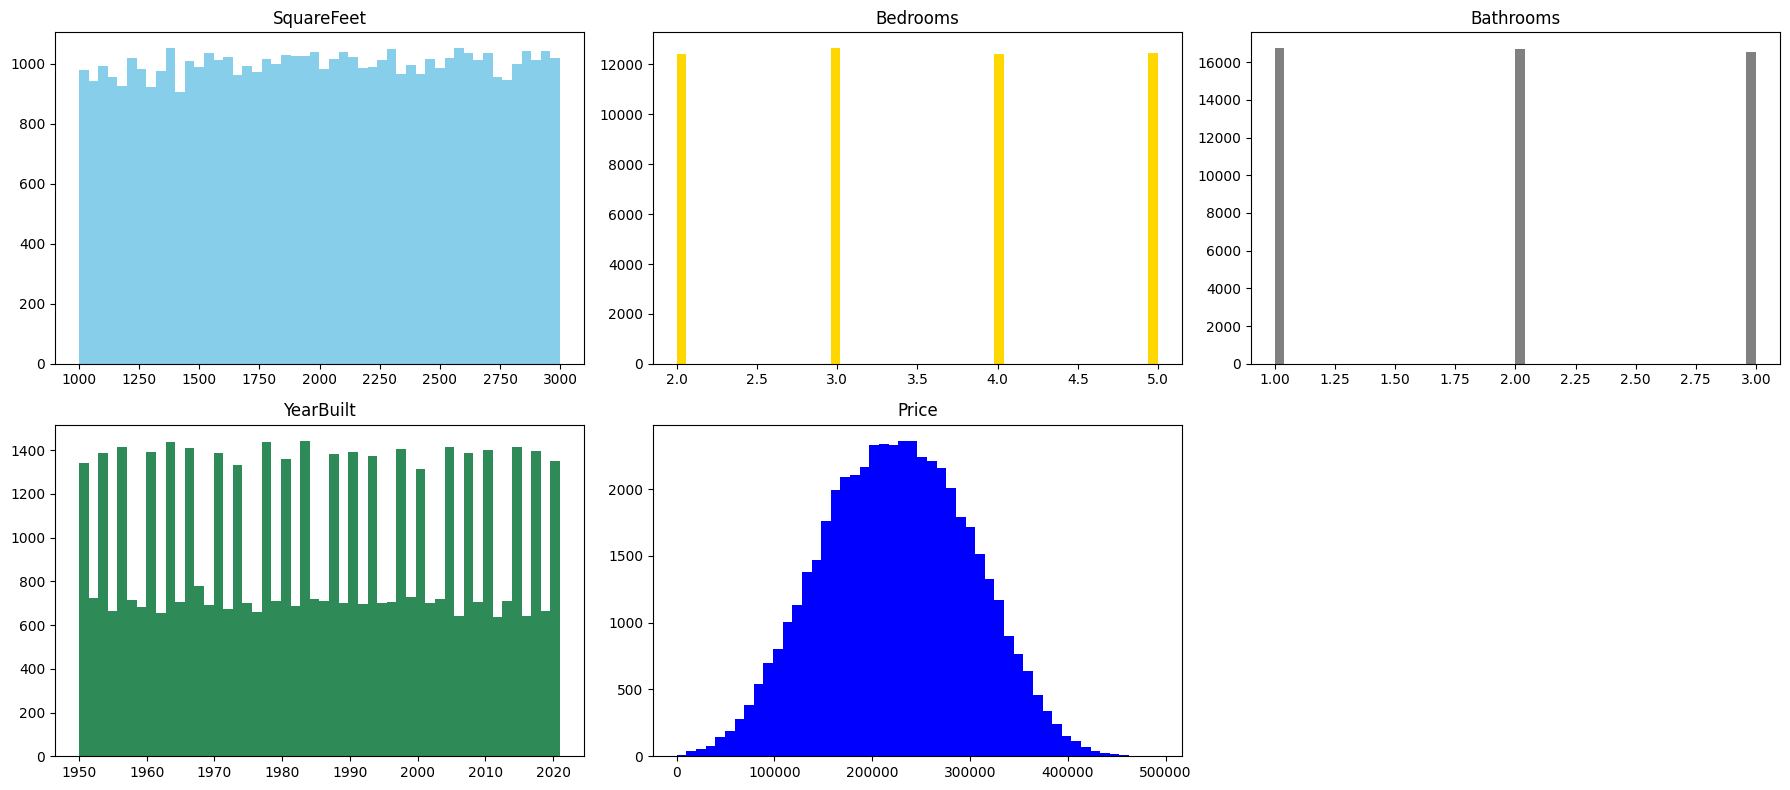

In [141]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
bin_number = 50

axes[0, 0].hist(df_encoded["SquareFeet"], bins=bin_number, color="skyblue")
axes[0, 0].set_title("SquareFeet")

axes[0, 1].hist(df_encoded["Bedrooms"], bins=bin_number, color="gold")
axes[0, 1].set_title("Bedrooms")

axes[0, 2].hist(df_encoded["Bathrooms"], bins=bin_number, color="grey")
axes[0, 2].set_title("Bathrooms")

axes[1, 0].hist(df_encoded["YearBuilt"], bins=bin_number, color="seagreen")
axes[1, 0].set_title("YearBuilt")

axes[1, 1].hist(df_encoded["Price"], bins=bin_number, color="blue")
axes[1, 1].set_title("Price")

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

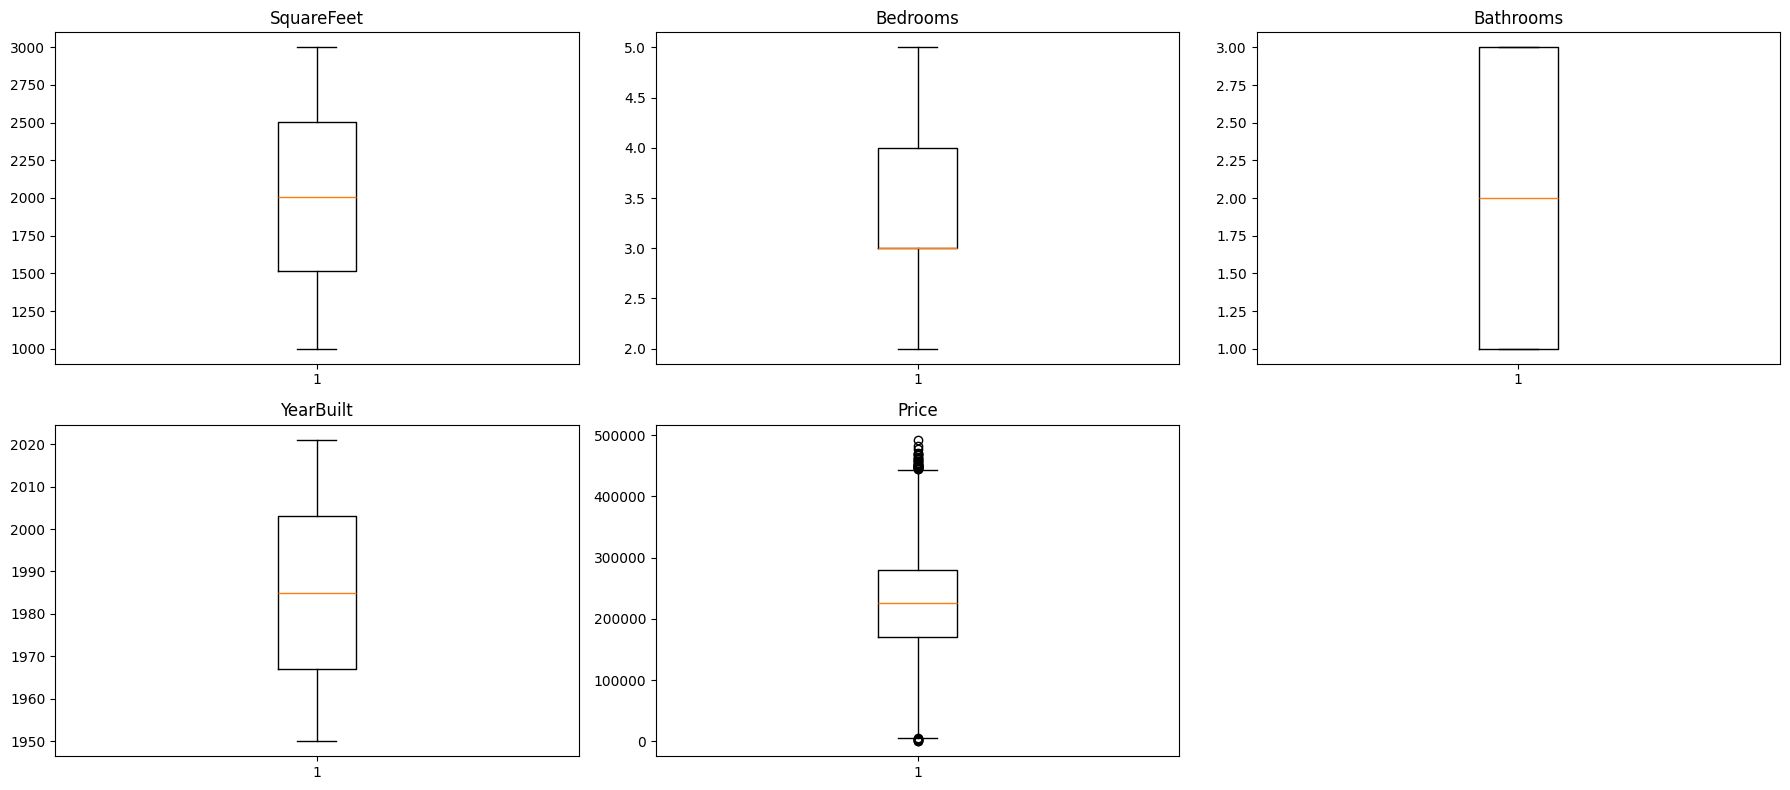

In [142]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

axes[0, 0].boxplot(df_encoded["SquareFeet"], vert=True)
axes[0, 0].set_title("SquareFeet")

axes[0, 1].boxplot(df_encoded["Bedrooms"], vert=True)
axes[0, 1].set_title("Bedrooms")

axes[0, 2].boxplot(df_encoded["Bathrooms"], vert=True)
axes[0, 2].set_title("Bathrooms")

axes[1, 0].boxplot(df_encoded["YearBuilt"], vert=True)
axes[1, 0].set_title("YearBuilt")

axes[1, 1].boxplot(df_encoded["Price"], vert=True)
axes[1, 1].set_title("Price")

fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


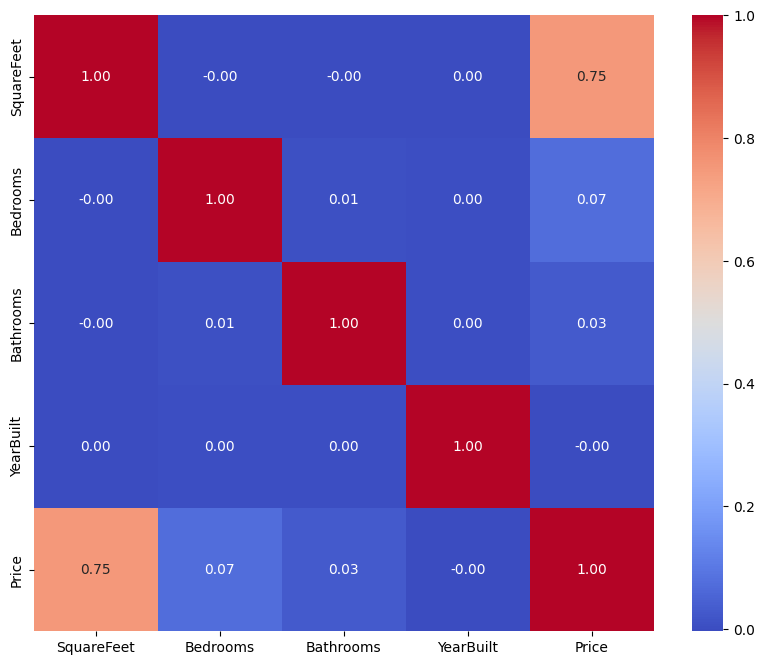

In [143]:
df_corr = df_encoded.drop(columns=["Neighborhood_Rural", "Neighborhood_Urban", "Neighborhood_Suburb"])

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [144]:
df_encoded.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960,0.333507,0.334467,0.332026
std,575.350298,1.116325,0.815859,20.718407,75995.682992,0.471471,0.471809,0.470945
min,1000.000000,2.000000,1.000000,1950.000000,154.779120,0.000000,0.000000,0.000000
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130,0.000000,0.000000,0.000000
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857,0.000000,0.000000,0.000000
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288,1.000000,1.000000,1.000000
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972,1.000000,1.000000,1.000000


In [145]:
df_encoded[df_encoded["Price"] < 3000]

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
17216,1013,2,1,2018,276.063516,0,1,0
29980,1005,3,3,1978,2697.849758,0,0,1
36235,1112,3,1,1978,2360.274450,0,1,0
40144,1006,2,1,1973,154.779120,0,1,0


In [146]:
dados = df_encoded.to_numpy()
dados

array([[2.126e+03, 4.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.459e+03, 3.000e+00, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.860e+03, 2.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.979e+03, 5.000e+00, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.596e+03, 5.000e+00, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.572e+03, 5.000e+00, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]], shape=(49978, 8))

In [149]:
X = df_encoded.drop(columns=["Price"]).to_numpy()
y = df_encoded["Price"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_test_pred)


print(r2)
print(mse)

0.5761680101788184
2451339446.998829
